### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [87]:
data.head()
data['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

2. Investigate the dataset for missing or problematic data.

In [4]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#3.Decide what to do about your missing data -- drop, replace, other...

#Removing the data where destination is Work but the occupation is Unemployed
data = data.query("destination != 'Work' and occupation != 'Unemployed'")
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
176,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,26,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
177,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
178,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,26,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,0


In [6]:
# checking for data where direction_same and direction_opp is 1
#Added new column Accept_Reject
def validate_y(Y):
    if Y == 1:
        decision = 'Accepted'
    else:
        decision = 'Rejected'
    return decision

data['Accept_Reject'] = data['Y'].apply(validate_y)


4. What proportion of the total observations chose to accept the coupon? 



In [7]:
# Grouping the data based on the coupon category to get the total count of coupons
data_acceptance=data.groupby(['coupon']).size().to_frame('total_count').reset_index()

#Creating another data frame to get th count of coupons based on acceptance or rejection
data_coupon_split= data.query("Y ==1").groupby(['coupon','Accept_Reject']).size().to_frame('coupon_cnt').reset_index()

#Merging data_acceptance and data_coupon_split dataframes
data_merged=pd.merge(left=data_acceptance, right=data_coupon_split, on='coupon', how='inner')

#New attribute being added to the dataframe data_merged to display the acceptance proportion percent for each coupon category
data_merged['acceptance_proportion %'] = data_merged['coupon_cnt']/data_merged['total_count']*100

#displaying first 5 rows of the dataframe data_merged
data_merged.head(5)

,coupon,total_count,Accept_Reject,coupon_cnt,acceptance_proportion %
0,Bar,1309,Accepted,580,44.308633
1,Carry out & Take away,1385,Accepted,1066,76.967509
2,Coffee House,2645,Accepted,1354,51.190926
3,Restaurant(20-50),893,Accepted,416,46.584546
4,Restaurant(<20),1888,Accepted,1398,74.046610


5. Use a bar plot to visualize the `coupon` column.

In [8]:
#Generating bar plot to display the acceptance proportion % for each coupon category
fig=px.bar(data_merged,x='coupon',y='acceptance_proportion %', color='coupon')

#Updating the xaxis and yaxis label for the graph
fig.update_layout(xaxis_title='Coupon Category', yaxis_title='Acceptance %')
fig.write_image('images/AcceptanceProportion.png')


In [9]:
#Generating another graph to display the percetange of acceptance and rejection for the coupon category

data_coupon_split_1= data.groupby(['coupon','Accept_Reject']).size().to_frame('coupon_cnt').reset_index()
#Merging 2 dataframes data_accpetance and data_coupon_split
data_merged_accept_reject=pd.merge(left=data_acceptance, right=data_coupon_split_1, on='coupon', how='inner')

# Creating new attribute proportion % to get the acceptance/rejection percent for each coupon category
data_merged_accept_reject['proportion %'] = data_merged_accept_reject['coupon_cnt']/data_merged_accept_reject['total_count']*100

# Generating bar plot using plotly
fig=px.bar(data_merged_accept_reject,x='coupon',y='proportion %', color='Accept_Reject')

# Setting the xaxis and yaxis lable
fig.update_layout(xaxis_title='Coupon Category', yaxis_title='Acceptance %')
fig.write_image('images/AcceptanceRejection.png')

In [10]:
6. Use a histogram to visualize the temperature column.

SyntaxError: invalid syntax (1782261172.py, line 1)

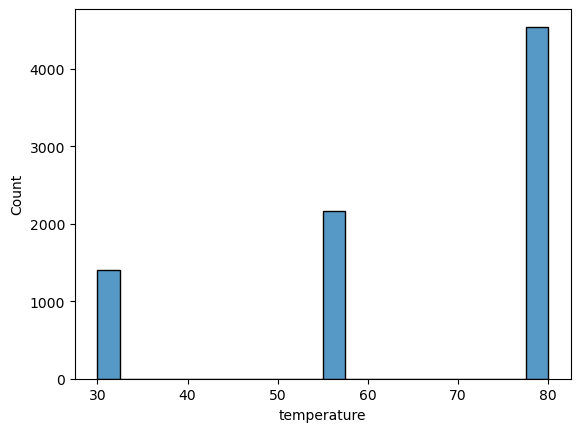

In [31]:
sns.histplot(data['temperature'], bins=20)
plt.show
plt.savefig('images/Temparature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [41]:
#Creating new data frame df_bar by filtering the rows which have coupon is Bar and excluding null values in Bar column
df_bar = data.query("coupon == 'Bar'")
print(len(df_bar))
df_bar['age'].unique()


1309


array(['21', '46', '26', '41', '31', '50plus', '36', 'below21'],
      dtype=object)

2. What proportion of bar coupons were accepted?


In [13]:
# Grouping the data based on the coupon category to get the total count of coupons
data_bar_acceptance=df_bar.groupby(['coupon']).size().to_frame('total_count').reset_index()

#Creating another data frame to get th count of coupons based on acceptance or rejection
data_barcoupon_split= data.query("Y ==1").groupby(['coupon','Accept_Reject']).size().to_frame('coupon_cnt').reset_index()

#Merging data_acceptance and data_coupon_split dataframes
data_bar_merged=pd.merge(left=data_bar_acceptance, right=data_barcoupon_split, on='coupon', how='inner')

#New attribute being added to the dataframe data_merged to display the acceptance proportion percent for each coupon category
data_bar_merged['acceptance_proportion %'] = data_bar_merged['coupon_cnt']/data_bar_merged['total_count']*100

#displaying first 5 rows of the dataframe data_merged
data_bar_merged.head(5)

,coupon,total_count,Accept_Reject,coupon_cnt,acceptance_proportion %
0,Bar,1309,Accepted,580,44.308633


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


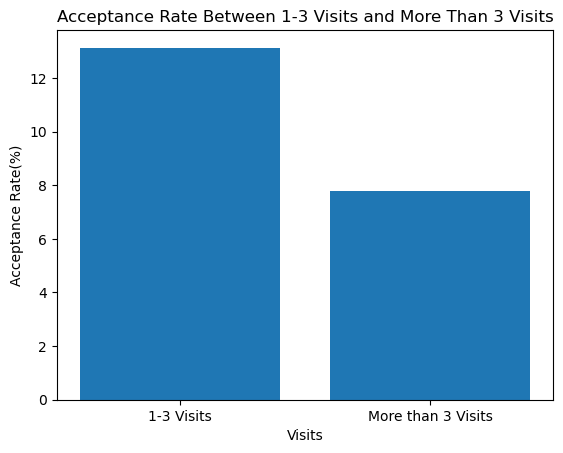

<Figure size 640x480 with 0 Axes>

In [37]:
#Perform data cleansing by exlcuding rows where blanks exists in Bar column for the coupon='Bar'
df_bar = df_bar.dropna(subset=['Bar'])


#Perform data cleansing on Bar column by classifying it into 4 values
df_bar_cleanse =df_bar.replace({'Bar': {'1~3': '1-3 Visits','never': 'Never Visited', 'less1': 'Never Visited','4~8': 'More than 3 Visits','gt8': 'More than 3 Visits'}}).reset_index()


# Grouping the data based on the coupon category to get the total count of coupons
data_barcleanse_acceptance=df_bar_cleanse.groupby(['coupon']).size().to_frame('total_count').reset_index()


#Creating another data frame to get th count of coupons based on acceptance or rejection
data_barcoupon_split= df_bar_cleanse.query("Y ==1").groupby(['coupon','Bar','Accept_Reject']).size().to_frame('coupon_cnt').reset_index()


#Merging data_acceptance and data_coupon_split dataframes
data_bar_merged=pd.merge(left=data_barcleanse_acceptance, right=data_barcoupon_split, on='coupon', how='inner')

#New attribute being added to the dataframe data_merged to display the acceptance proportion percent for each coupon category
data_bar_merged['acceptance_proportion %'] = data_bar_merged['coupon_cnt']/data_bar_merged['total_count']*100
data_bar_merged1=data_bar_merged.query("Bar !='Never Visited'")
data_bar_merged.head(10)

#Generate graph to compare the acceptance rate
plt.bar(data_bar_merged1['Bar'],data_bar_merged1['acceptance_proportion %'])
plt.title('Acceptance Rate Between 1-3 Visits and More Than 3 Visits')
plt.xlabel('Visits')
plt.ylabel('Acceptance Rate(%)')
plt.show()
plt.savefig('images/AcceptanceRateVisits.png')
data_bar_merged1.head(10)

#The difference between the acceptance rate for 1-3 Vists and more than 3 visist is 5.33%

acceptance_rate_variance = 5.33


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [83]:
#Perform data cleansing by exlcuding rows where blanks exists in Bar column for the coupon='Bar'
df_bar_drivers = df_bar.dropna(subset=['Bar'])


# defining list for Bar visits
once_a_month = ['1~3','4~8','gt8']


#cleansing data by replacing the age to categorize into 2 groups Below 25 ad Above 25
df_bardrivers_age=df_bar_drivers.replace({'age': {'21': 'Below 25','46': 'Above 25', '26': 'Above 25','41': 'Above 25','31': 'Above 25','36': 'Above 25','50plus': 'Above 25','below21': 'Below 25'}}).reset_index()

#querying dataframe to extract records where drivers visited Bar more than once a month
df_bardrivers_age =df_bardrivers_age.query('Bar in @once_a_month')

#Get total rows in the dataframe
df_total_bardrivers = len(df_bardrivers_age)
print("Total Drivers visiting Bar are ",df_total_bardrivers)

#querying dataframe to extract records where drivers above 25 years of age and accepted the coupon
df_bardrivers_25age =df_bardrivers_age.query("age == 'Above 25' and Y == 1")

#Get total rows in the dataframe
df_25above_drivers = len(df_bardrivers_25age)
print("Drivers Above 25 and visiting more than once a month are ", df_25above_drivers)

#querying dataframe to extract records where drivers of all other ages excluding Above 25 and accepted the coupon
df_allothers_drivers=df_bardrivers_age.query("age == 'Below 25' and Y == 1")

#Get total rows in the dataframe
df_allothers_count = len(df_allothers_drivers)
print("Drivers of all ages excluding Above 25 years of age visiting Bar are ", df_allothers_count)

#Calculate the acceptance rate for 25 Above
accept_rate_above25 = df_25above_drivers/df_total_bardrivers*100
print("Acceptance rate for driver above 25 years of age is "+ str(accept_rate_above25) +" percent")

#Calculate the acceptance rate for all other ages
accept_rate_allothers = df_allothers_count/df_total_bardrivers*100
print("Acceptance rate for all others drivers excluding above 25 years of age is "+ str(accept_rate_allothers) +" percent")

#Calculate the acceptance rate variance between Above 25 age drivers and all other ages(excluding Above 25) drivers
accept_rate_variance = accept_rate_above25 - accept_rate_allothers

final_conclusion = "Yes, there is a difference of " + str(accept_rate_variance) + " percent between 25 years above age Vs all others"

print(final_conclusion)




Total Drivers visiting Bar are  400
Drivers Above 25 and visiting more than once a month are  198
Drivers of all ages excluding Above 25 years of age visiting Bar are  73
Acceptance rate for driver above 25 years of age is 49.5 percent
Acceptance rate for all others drivers excluding above 25 age is 18.25 percent
Yes, there is a difference of 31.25 percent between 25 years above age Vs all others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [92]:
#Perform data cleansing by exlcuding rows where blanks exists in Bar column for the coupon='Bar'
df_bar_drivers = df_bar.dropna(subset=['Bar'])

'Farming Fishing & Forestry'


# defining list for Bar visits
once_a_month = ['1~3','4~8','gt8']


#cleansing data by replacing the age to categorize into 2 groups Below 25 ad Above 25
df_bardrivers_age=df_bar_drivers.replace({'age': {'21': 'Below 25','46': 'Above 25', '26': 'Above 25','41': 'Above 25','31': 'Above 25','36': 'Above 25','50plus': 'Above 25','below21': 'Below 25'}}).reset_index()

#querying dataframe to extract records where drivers visited Bar more than once a month
df_bardrivers_age =df_bardrivers_age.query('Bar in @once_a_month')

#Get total rows in the dataframe
df_total_bardrivers = len(df_bardrivers_age)
print("Total Drivers visiting Bar are ",df_total_bardrivers)

#querying dataframe to extract records where drivers above 25 years of age and accepted the coupon
df_barpassangers_nokid =df_bardrivers_age.query("passanger != 'Kid(s)' and Y == 1 and occupation !='Farming Fishing & Forestry'")


#Get total rows in the dataframe
df_bardrivers_nokids = len(df_barpassangers_nokid)
print("Total Drivers having passangers with no kids and occupation is not Farming Fishing, or Forestry are ", df_bardrivers_nokids)

#querying dataframe to extract records where drivers of all other ages excluding Above 25 and accepted the coupon
df_allothers_drivers=df_bardrivers_age.query("passanger != 'Kid(s)' and Y == 1 and occupation == 'Farming Fishing & Forestry'")

#Get total rows in the dataframe
df_allothers_count = len(df_allothers_drivers)
print("Total Drivers having passengers with no kids and occupation is Farming Fishing, or Forestry are ", df_allothers_count)

#Calculate the acceptance rate for 25 Above
accept_rate_above25 = df_25above_drivers/df_total_bardrivers*100
print("Acceptance rate for driver above 25 years of age is "+ str(accept_rate_above25) +" percent")

#Calculate the acceptance rate for all other ages
accept_rate_allothers = df_allothers_count/df_total_bardrivers*100
print("Acceptance rate for all others drivers excluding above 25 years of age is "+ str(accept_rate_allothers) +" percent")

#Calculate the acceptance rate variance between Above 25 age drivers and all other ages(excluding Above 25) drivers
accept_rate_variance = accept_rate_above25 - accept_rate_allothers

final_conclusion = "Yes, there is a difference of " + str(accept_rate_variance) + " percent between 25 years above age Vs all others"

print(final_conclusion)


Total Drivers visiting Bar are  400
Total Drivers having passangers with no kids and occupation is not Farming Fishing, or Forestry are  254
Total Drivers having passengers with no kids and occupation is Farming Fishing, or Forestry are  0
Acceptance rate for driver above 25 years of age is 49.5 percent
Acceptance rate for all others drivers excluding above 25 years of age is 0.0 percent
Yes, there is a difference of 49.5 percent between 25 years above age Vs all others


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  